In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

2023-11-04 18:18:34.645696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-04 18:18:34.792547: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-04 18:18:34.792570: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-04 18:18:35.469241: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255
x_test = x_test /255

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2023-11-04 18:18:36.966310: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-04 18:18:36.966328: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-04 18:18:36.966343: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dnyanesh-Inspiron-3583): /proc/driver/nvidia/version does not exist
2023-11-04 18:18:36.966505: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='sgd',
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6584 - accuracy: 0.8361 - val_loss: 0.3583 - val_accuracy: 0.9026
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3359 - accuracy: 0.9062 - val_loss: 0.2943 - val_accuracy: 0.9194
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2884 - accuracy: 0.9186 - val_loss: 0.2622 - val_accuracy: 0.9248
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9263 - val_loss: 0.2410 - val_accuracy: 0.9304
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2374 - accuracy: 0.9332 - val_loss: 0.2251 - val_accuracy: 0.9351
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2192 - accuracy: 0.9390 - val_loss: 0.2085 - val_accuracy: 0.9414
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2036 - accuracy: 0.9435 - val_loss: 0.1936 - val_accuracy:

In [8]:
test_loss, test_acc = model.evaluate (x_test, y_test)
print("Loss = %3f" %test_loss)
print("Accuracy = %3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1638 - accuracy: 0.9546
Loss = 0.163758
Accuracy = 0.954600


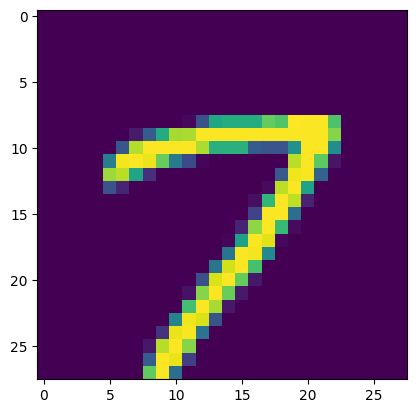

313/313 [==============================] - 0s 1ms/step


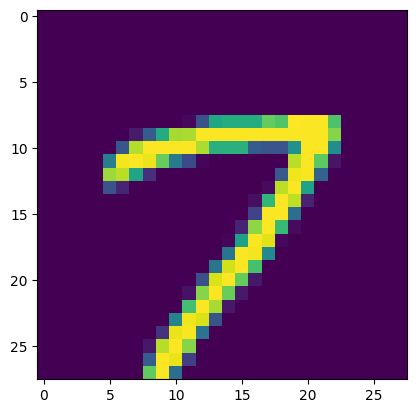

In [9]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [10]:
print('Predicted Value :', predicted_value[n])

Predicted Value : [2.0311956e-04 3.0375108e-07 4.4058965e-05 5.4409244e-05 2.1482485e-06
 3.9740180e-04 3.1467600e-08 9.9536622e-01 1.1988924e-04 3.8122858e-03]


<function matplotlib.pyplot.show(close=None, block=None)>

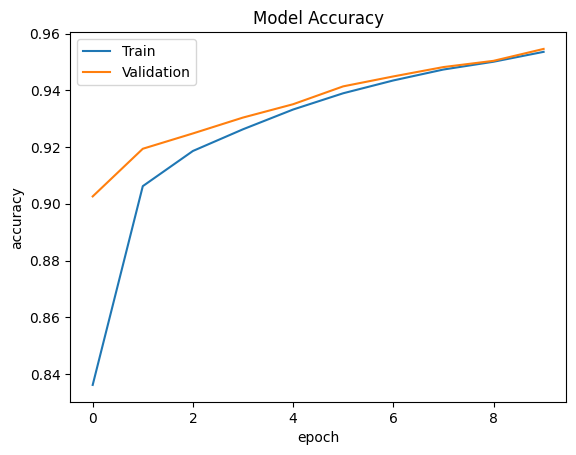

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

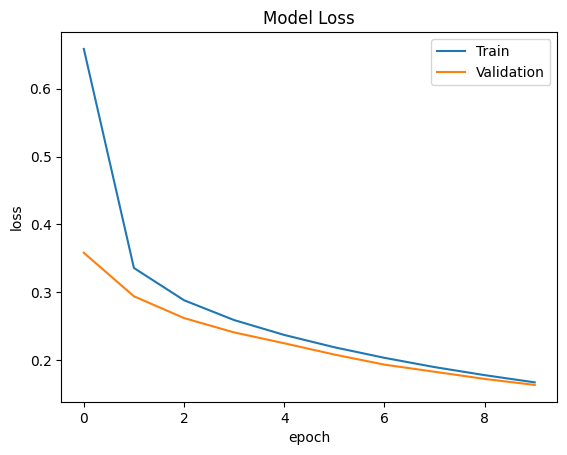

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show

In [13]:
pwd

'/home/dnyanesh/Desktop/DL lab '